# 데이터 사이언스 특강 기말 프로젝트

In [1]:
import pandas as pd
df = pd.read_csv("/content/test-2.csv")

In [2]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.shape

(25976, 25)

#### 변수 목록

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 탐색적 데이터 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df.shape

(25976, 25)

In [ ]:
# 결측치 확인
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
y = df['satisfaction']

In [ ]:
# 클래스별 빈도 계산
class_counts = Counter(y)

# 데이터 준비
labels = list(class_counts.keys())
counts = list(class_counts.values())

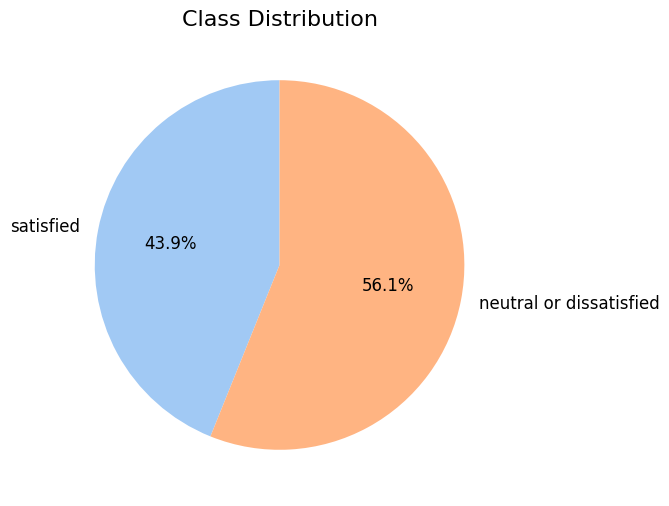

In [ ]:
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')[:len(class_counts)]  # 이쁜 색상 팔레트
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Class Distribution', fontsize=16)
plt.show()

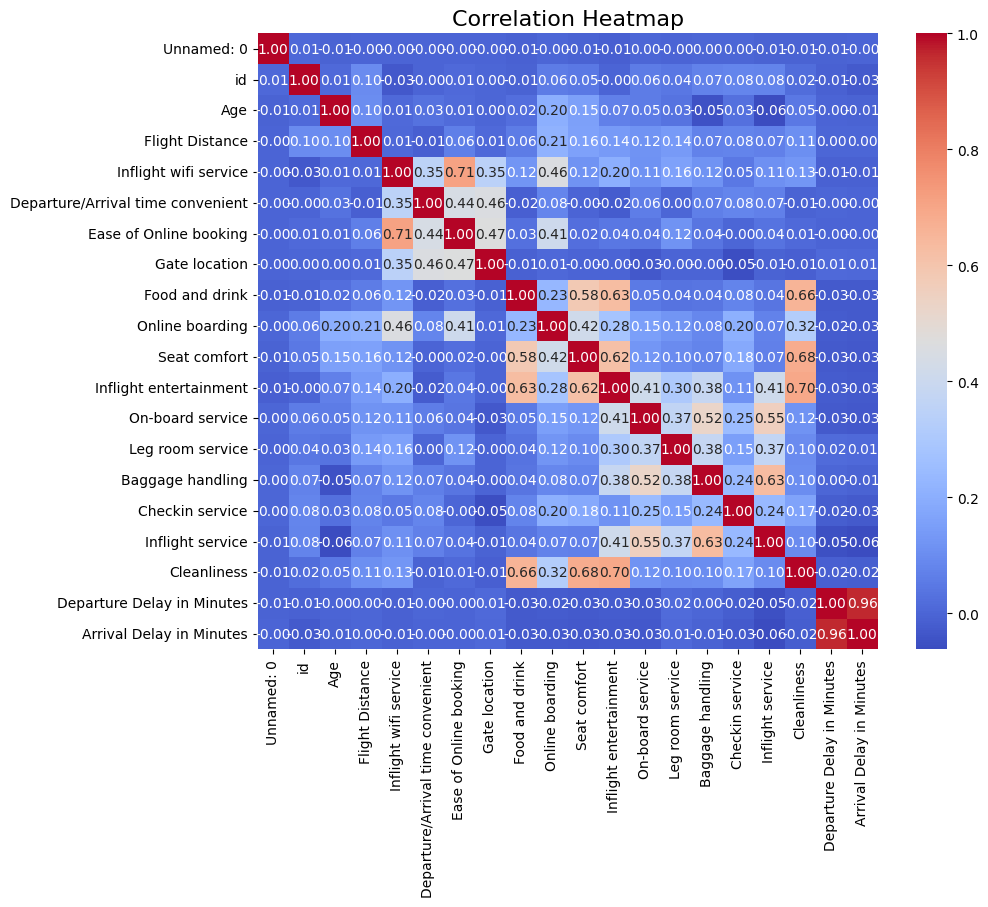

In [ ]:
# 상관관계 히트맵
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
df = pd.read_csv("/content/test-2.csv")

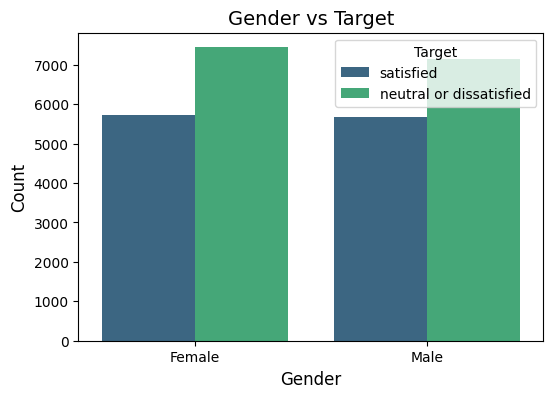

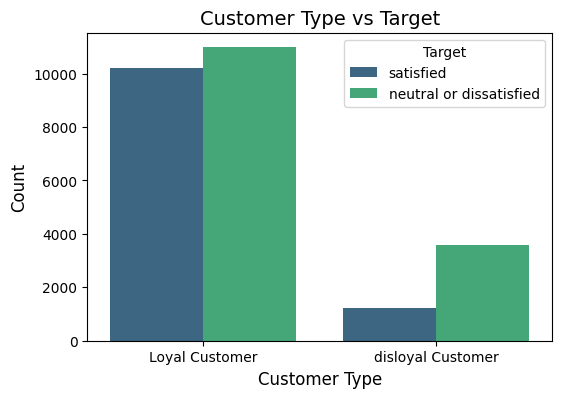

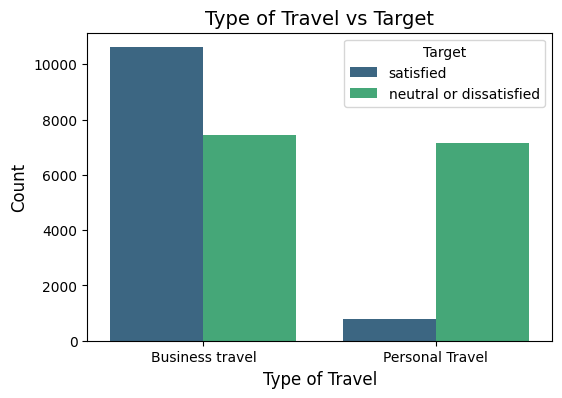

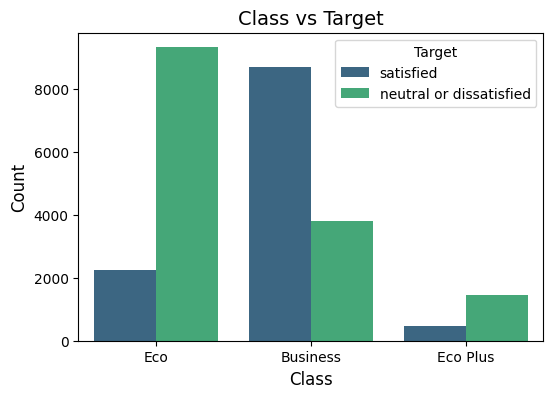

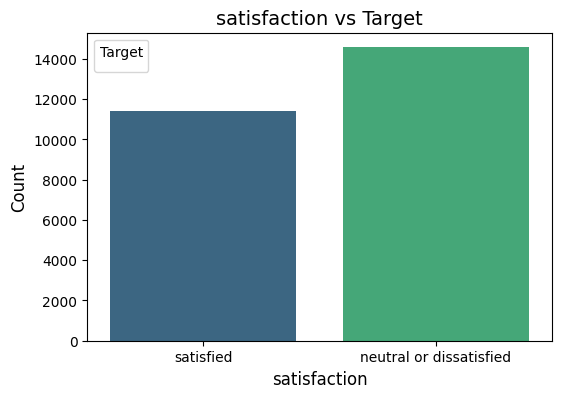

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# 범주형 변수별 타겟 분포 시각화
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='satisfaction', data=df, palette='viridis')
    plt.title(f"{col} vs Target", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Target')
    plt.show()

## 데이터 전처리

In [ ]:
# 결측치 처리
df['Arrival Delay in Minutes'].std()

37.517538587656645

In [ ]:
# 해당 변수의 편차가 크지 않음으로, 해당 변수의 평균값으로 대체
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)
df.isnull().sum()

<ipython-input-2-61c8b444aba2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [3]:
# 범주형 변수 encoding
categorical_variables = ['Gender','Customer Type','Type of Travel','Class']
df = pd.get_dummies(df, columns = categorical_variables)
df.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,19556,52,160,5,4,3,4,3,4,...,satisfied,True,False,True,False,True,False,False,True,False
1,1,90035,36,2863,1,1,3,1,5,4,...,satisfied,True,False,True,False,True,False,True,False,False
2,2,12360,20,192,2,0,2,4,2,2,...,neutral or dissatisfied,False,True,False,True,True,False,False,True,False
3,3,77959,44,3377,0,0,0,2,3,4,...,satisfied,False,True,True,False,True,False,True,False,False
4,4,36875,49,1182,2,3,4,3,4,1,...,satisfied,True,False,True,False,True,False,False,True,False


## 모델 적합

In [4]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

y = df.pop('satisfaction')
X = df.iloc[:,2:]
X = X.drop(['Arrival Delay in Minutes'], axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Z-score 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

# 변수명 유지하면서 DataFrame으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)

In [7]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,50,True,False,True,False,True,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,0,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,0,False,True,True,False,True,False,True,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,0,True,False,True,False,True,False,False,True,False


In [ ]:
standardized_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.817887,-1.035171,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,0.781143,0.985932,-0.985932,0.476040,-0.476040,0.663378,-0.663378,-0.962736,1.116370,-0.282275
1,-0.239238,1.671443,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.393543,0.985932,-0.985932,0.476040,-0.476040,0.663378,-0.663378,1.038707,-0.895761,-0.282275
2,-1.296363,-1.003128,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-0.393543,-1.014269,1.014269,-2.100665,2.100665,0.663378,-0.663378,-0.962736,1.116370,-0.282275
3,0.289325,2.186131,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.233358,-1.014269,1.014269,0.476040,-0.476040,0.663378,-0.663378,1.038707,-0.895761,-0.282275
4,0.619676,-0.011804,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.140405,0.985932,-0.985932,0.476040,-0.476040,0.663378,-0.663378,-0.962736,1.116370,-0.282275


In [ ]:
y

,satisfaction
0,satisfied
1,satisfied
2,neutral or dissatisfied
3,satisfied
4,satisfied
...,...
25971,neutral or dissatisfied
25972,satisfied
25973,neutral or dissatisfied
25974,satisfied


In [8]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

In [9]:
# Stratified K-Fold 설정
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 1. 로지스틱 회귀

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
accuracy_logistic = []

In [ ]:
for train_index, test_index in kf.split(standardized_df,y):

    X_train, X_test = standardized_df.iloc[train_index], standardized_df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logistic_model = LogisticRegression(random_state=0) # 모델 선언
    logistic_model.fit(X_train, y_train) # 모델 학습

    y_pred_logistic = logistic_model.predict(X_test) # 예측 라벨
    accuracy_logistic.append(accuracy_score(y_pred_logistic, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 기록 :", accuracy_logistic)
print("평균 정확도 :", np.mean(accuracy_logistic))

각 분할의 정확도 기록 : [0.8762509622786759, 0.8673724735322426, 0.8681424446583254, 0.872762271414822, 0.8700673724735323]
평균 정확도 : 0.8709191048715196


In [11]:
from sklearn.model_selection import cross_val_score

# 교차 검증 수행
cv_scores = cross_val_score(logistic_model, standardized_df, y, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.87240185 0.87064485 0.87045236 0.866795   0.87025987]
Mean CV Score: 0.8701
Standard Deviation: 0.0018


In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [13]:
import matplotlib.pyplot as plt

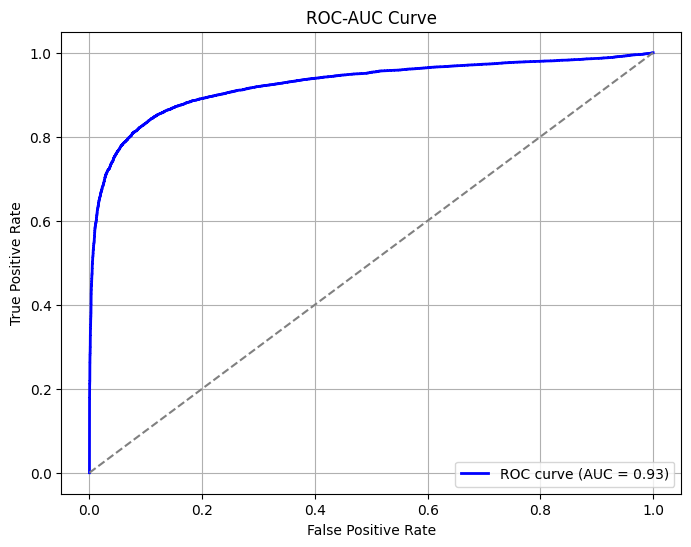

In [14]:
# LogisticRegression 모델
model = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)

# cross_val_predict로 예측 확률 구하기
y_pred_proba = cross_val_predict(model, standardized_df, y, cv=5, method='predict_proba')

# ROC-AUC 계산
fpr, tpr, thresholds = roc_curve(y_numeric, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 3. 랜덤 포레스트

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_rf = []

In [ ]:
for train_index, test_index in kf.split(X,y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_model = RandomForestClassifier(n_estimators=5, random_state=0) # 모델 선언
    rf_model.fit(X_train, y_train) # 모델 학습

    y_pred_rf = rf_model.predict(X_test) # 예측 라벨
    accuracy_rf.append(accuracy_score(y_pred_rf, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 기록 :", accuracy_rf)
print("평균 정확도 :", np.mean(accuracy_rf))

각 분할의 정확도 기록 : [0.9447652040030793, 0.9449470644850818, 0.944177093358999, 0.9445620789220405, 0.9484119345524543]
평균 정확도 : 0.9453726750643311


In [17]:
rf_model = RandomForestClassifier(n_estimators=5, random_state=0)

In [18]:
# 교차 검증 수행
cv_scores = cross_val_score(rf_model, standardized_df, y, cv=5, scoring='accuracy')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.94611239 0.94590953 0.95129933 0.94379211 0.94629451]
Mean CV Score: 0.9467
Standard Deviation: 0.0025


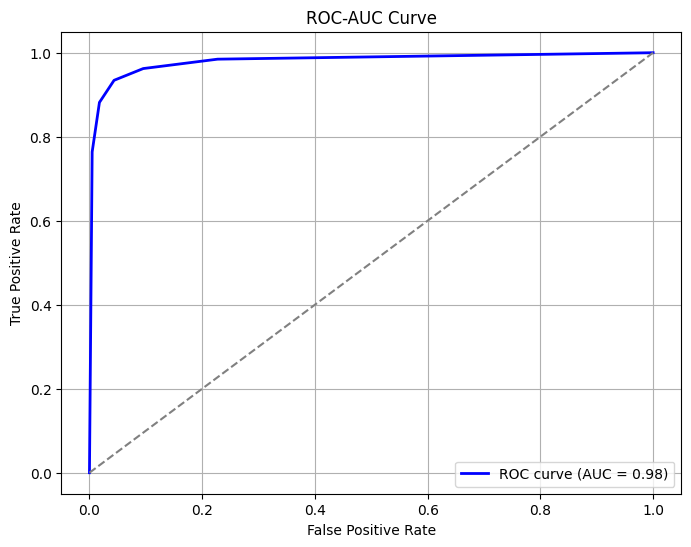

In [19]:
# Random forest 모델
rf_model = RandomForestClassifier(n_estimators=5, random_state=0)

# cross_val_predict로 예측 확률 구하기
y_pred_proba_rf = cross_val_predict(rf_model, standardized_df, y_numeric, cv=5, method='predict_proba')

# ROC-AUC 계산
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_numeric, y_pred_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### XGBoost


In [ ]:
accuracy_xgb = []

In [ ]:
import xgboost as xgb

In [ ]:
# DMatrix 생성
dtrain = xgb.DMatrix(standardized_df, label=y_numeric)

# 2. 하이퍼파라미터 설정
params = {
    "objective": "binary:logistic",  # 이진 분류
    "eval_metric": "logloss",       # 로그 손실
    "max_depth": 6,                 # 트리 깊이
    "eta": 0.3,                     # 학습률
    "seed": 42                      # 랜덤 시드
}

# 3. K-Fold Cross-Validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,           # 부스팅 반복 횟수
    nfold=5,                       # K-Fold 개수
    early_stopping_rounds=10,      # 조기 종료 기준
    metrics="auc",             # 평가 기준
    as_pandas=True,                # 결과를 Pandas DataFrame으로 반환
    seed=42
)

# 4. 결과 출력
print(cv_results)
print(f"최종 평균 accuracy: {cv_results['test-auc-mean'].mean()}")

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.976753       0.000308       0.975737      0.001423
1         0.981237       0.000565       0.979737      0.001725
2         0.983355       0.000252       0.981751      0.001966
3         0.984283       0.000262       0.982643      0.001757
4         0.985973       0.000343       0.984281      0.001938
..             ...            ...            ...           ...
77        0.999442       0.000078       0.993394      0.000503
78        0.999476       0.000075       0.993371      0.000508
79        0.999495       0.000078       0.993366      0.000502
80        0.999513       0.000078       0.993404      0.000513
81        0.999529       0.000080       0.993422      0.000513

[82 rows x 4 columns]
최종 평균 accuracy: 0.9917371359066174


In [ ]:
# 2. XGBoost 모델 학습
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 3. 예측 확률값 가져오기 (Positive Class의 확률)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 4. ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 5. ROC-AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [21]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 2. Stratified K-Fold 설정
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 3. ROC-AUC 시각화를 위한 저장 변수 초기화
tprs = []  # TPR (True Positive Rate) 저장
mean_fpr = np.linspace(0, 1, 100)  # FPR 기준 점수
aucs = []  # AUC 저장

# 4. K-fold 교차 검증
plt.figure(figsize=(10, 8))
for i, (train_idx, test_idx) in enumerate(cv.split(standardized_df, y_numeric)):
    X_train, X_test = standardized_df[train_idx], standardized_df[test_idx]
    y_train, y_test = y_numeric[train_idx], y_numeric[test_idx]

    # XGBoost 모델 학습
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)

    # 예측 확률값 가져오기
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC 커브 계산
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)  # FPR 기준으로 TPR 보간
    interp_tpr[0] = 0.0  # FPR=0일 때 TPR=0
    tprs.append(interp_tpr)

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # 각 fold의 ROC 곡선 시각화
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# 5. 평균 ROC 곡선 계산
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # FPR=1일 때 TPR=1
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # 대각선 기준선

# 6. 시각화 설정
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-fold Cross-Validated ROC-AUC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

KeyError: "None of [Index([    0,     2,     3,     4,     7,     8,    10,    12,    13,    14,\n       ...\n       25965, 25966, 25967, 25968, 25969, 25970, 25971, 25973, 25974, 25975],\n      dtype='int64', length=20780)] are in the [columns]"

<Figure size 1000x800 with 0 Axes>

### DNN

In [ ]:
fold_accuracies = []

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# K-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(standardized_df, y_numeric)):
    print(f"Fold {fold + 1}")

    # 학습/검증 데이터 분리
    X_train, X_val = standardized_df.iloc[train_idx], standardized_df.iloc[val_idx]
    y_train, y_val = y_numeric[train_idx], y_numeric[val_idx]

    # DNN 모델 정의
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # 출력층 (2 클래스 분류)
    ])

    # 모델 컴파일
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # 모델 학습
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=30,
                        batch_size=16,
                        verbose=1)

    # 검증 정확도 평가
    val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
    fold_accuracies.append(val_accuracy)
    print(f"Fold {fold + 1} Accuracy: {val_accuracy:.4f}")

# 최종 결과 출력
print(f"\nK-Fold Validation Accuracies: {fold_accuracies}")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")

Fold 1
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8536 - loss: 0.3434 - val_accuracy: 0.9201 - val_loss: 0.1930
Epoch 2/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9153 - loss: 0.2122 - val_accuracy: 0.9340 - val_loss: 0.1643
Epoch 3/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9271 - loss: 0.1823 - val_accuracy: 0.9392 - val_loss: 0.1527
Epoch 4/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9278 - loss: 0.1780 - val_accuracy: 0.9392 - val_loss: 0.1472
Epoch 5/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9315 - loss: 0.1618 - val_accuracy: 0.9452 - val_loss: 0.1357
Epoch 6/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9389 - loss: 0.1508 - val_accuracy: 0.9448 - val_loss: 0.1301
Epoch 7/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9451 - loss: 0.1373 - val_accuracy: 0.9459 - val_loss: 0.1274
Epoch 8/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9440 - loss: 0.1324 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8602 - loss: 0.3376 - val_accuracy: 0.9207 - val_loss: 0.1975
Epoch 2/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9125 - loss: 0.2104 - val_accuracy: 0.9265 - val_loss: 0.1749
Epoch 3/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9272 - loss: 0.1834 - val_accuracy: 0.9374 - val_loss: 0.1549
Epoch 4/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9337 - loss: 0.1699 - val_accuracy: 0.9438 - val_loss: 0.1427
Epoch 5/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9381 - loss: 0.1542 - val_accuracy: 0.9415 - val_loss: 0.1416
Epoch 6/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9414 - loss: 0.1491 - val_accuracy: 0.9451 - val_loss: 0.1319
Epoch 7/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9424 - loss: 0.1394 - val_accuracy: 0.9457 - val_loss: 0.1281
Epoch 8/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9478 - loss: 0.1281 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0.3499 - val_accuracy: 0.9228 - val_loss: 0.1962
Epoch 2/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9156 - loss: 0.2056 - val_accuracy: 0.9295 - val_loss: 0.1791
Epoch 3/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9247 - loss: 0.1855 - val_accuracy: 0.9392 - val_loss: 0.1588
Epoch 4/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9309 - loss: 0.1689 - val_accuracy: 0.9399 - val_loss: 0.1523
Epoch 5/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9433 - loss: 0.1478 - val_accuracy: 0.9432 - val_loss: 0.1443
Epoch 6/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.1556 - val_accuracy: 0.9490 - val_loss: 0.1364
Epoch 7/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9477 - loss: 0.1344 - val_accuracy: 0.9451 - val_loss: 0.1393
Epoch 8/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9460 - loss: 0.1315 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8625 - loss: 0.3464 - val_accuracy: 0.9195 - val_loss: 0.1844
Epoch 2/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9155 - loss: 0.2149 - val_accuracy: 0.9353 - val_loss: 0.1563
Epoch 3/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9193 - loss: 0.2007 - val_accuracy: 0.9390 - val_loss: 0.1461
Epoch 4/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9345 - loss: 0.1658 - val_accuracy: 0.9430 - val_loss: 0.1401
Epoch 5/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9365 - loss: 0.1551 - val_accuracy: 0.9509 - val_loss: 0.1277
Epoch 6/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9386 - loss: 0.1503 - val_accuracy: 0.9509 - val_loss: 0.1203
Epoch 7/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9424 - loss: 0.1394 - val_accuracy: 0.9517 - val_loss: 0.1135
Epoch 8/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9457 - loss: 0.1340 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8611 - loss: 0.3399 - val_accuracy: 0.9249 - val_loss: 0.1924
Epoch 2/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9192 - loss: 0.2078 - val_accuracy: 0.9321 - val_loss: 0.1658
Epoch 3/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9250 - loss: 0.1853 - val_accuracy: 0.9413 - val_loss: 0.1521
Epoch 4/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9333 - loss: 0.1662 - val_accuracy: 0.9467 - val_loss: 0.1373
Epoch 5/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9372 - loss: 0.1510 - val_accuracy: 0.9457 - val_loss: 0.1352
Epoch 6/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9418 - loss: 0.1457 - val_accuracy: 0.9526 - val_loss: 0.1258
Epoch 7/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9438 - loss: 0.1380 - val_accuracy: 0.9505 - val_loss: 0.1216
Epoch 8/30
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9460 - loss: 0.1357 - val_accurac

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Fold 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


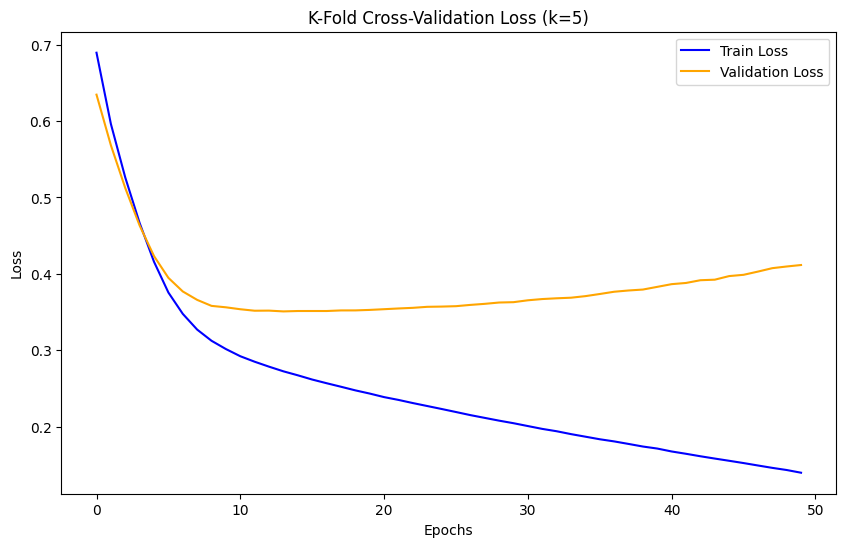

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 예제 데이터 생성 (이진 분류)
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 모델 생성 함수
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-Fold 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_losses = []
val_losses = []

# K-Fold Cross-Validation 수행
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}/{k}")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_model()
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, verbose=0)

    # 각 폴드의 Loss 저장
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# 평균 Loss 계산
mean_train_loss = np.mean(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)

# Loss 시각화
plt.figure(figsize=(10, 6))
plt.plot(mean_train_loss, label='Train Loss', color='blue')
plt.plot(mean_val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'K-Fold Cross-Validation Loss (k={k})')
plt.legend()
plt.show()